In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
df.describe()
# There seems like a large number of outliers in the volume, Avg Price , Total sales Value  and Net Sales Value columns.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [4]:
# Data Visualization
# Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.


(array([213., 137.,  49.,  26.,  15.,   2.,   0.,   4.,   1.,   3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

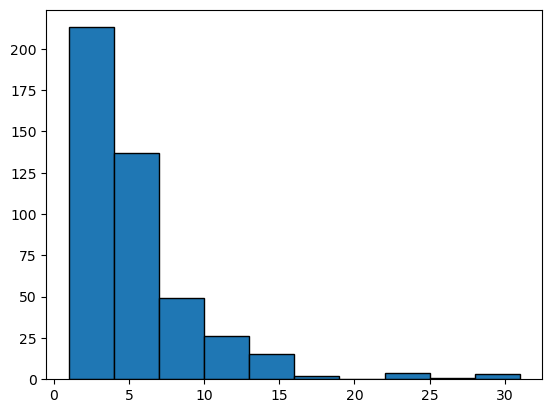

In [5]:
plt.hist(df.Volume,edgecolor="black")  #Histogram for Volume shows skewness towards right side

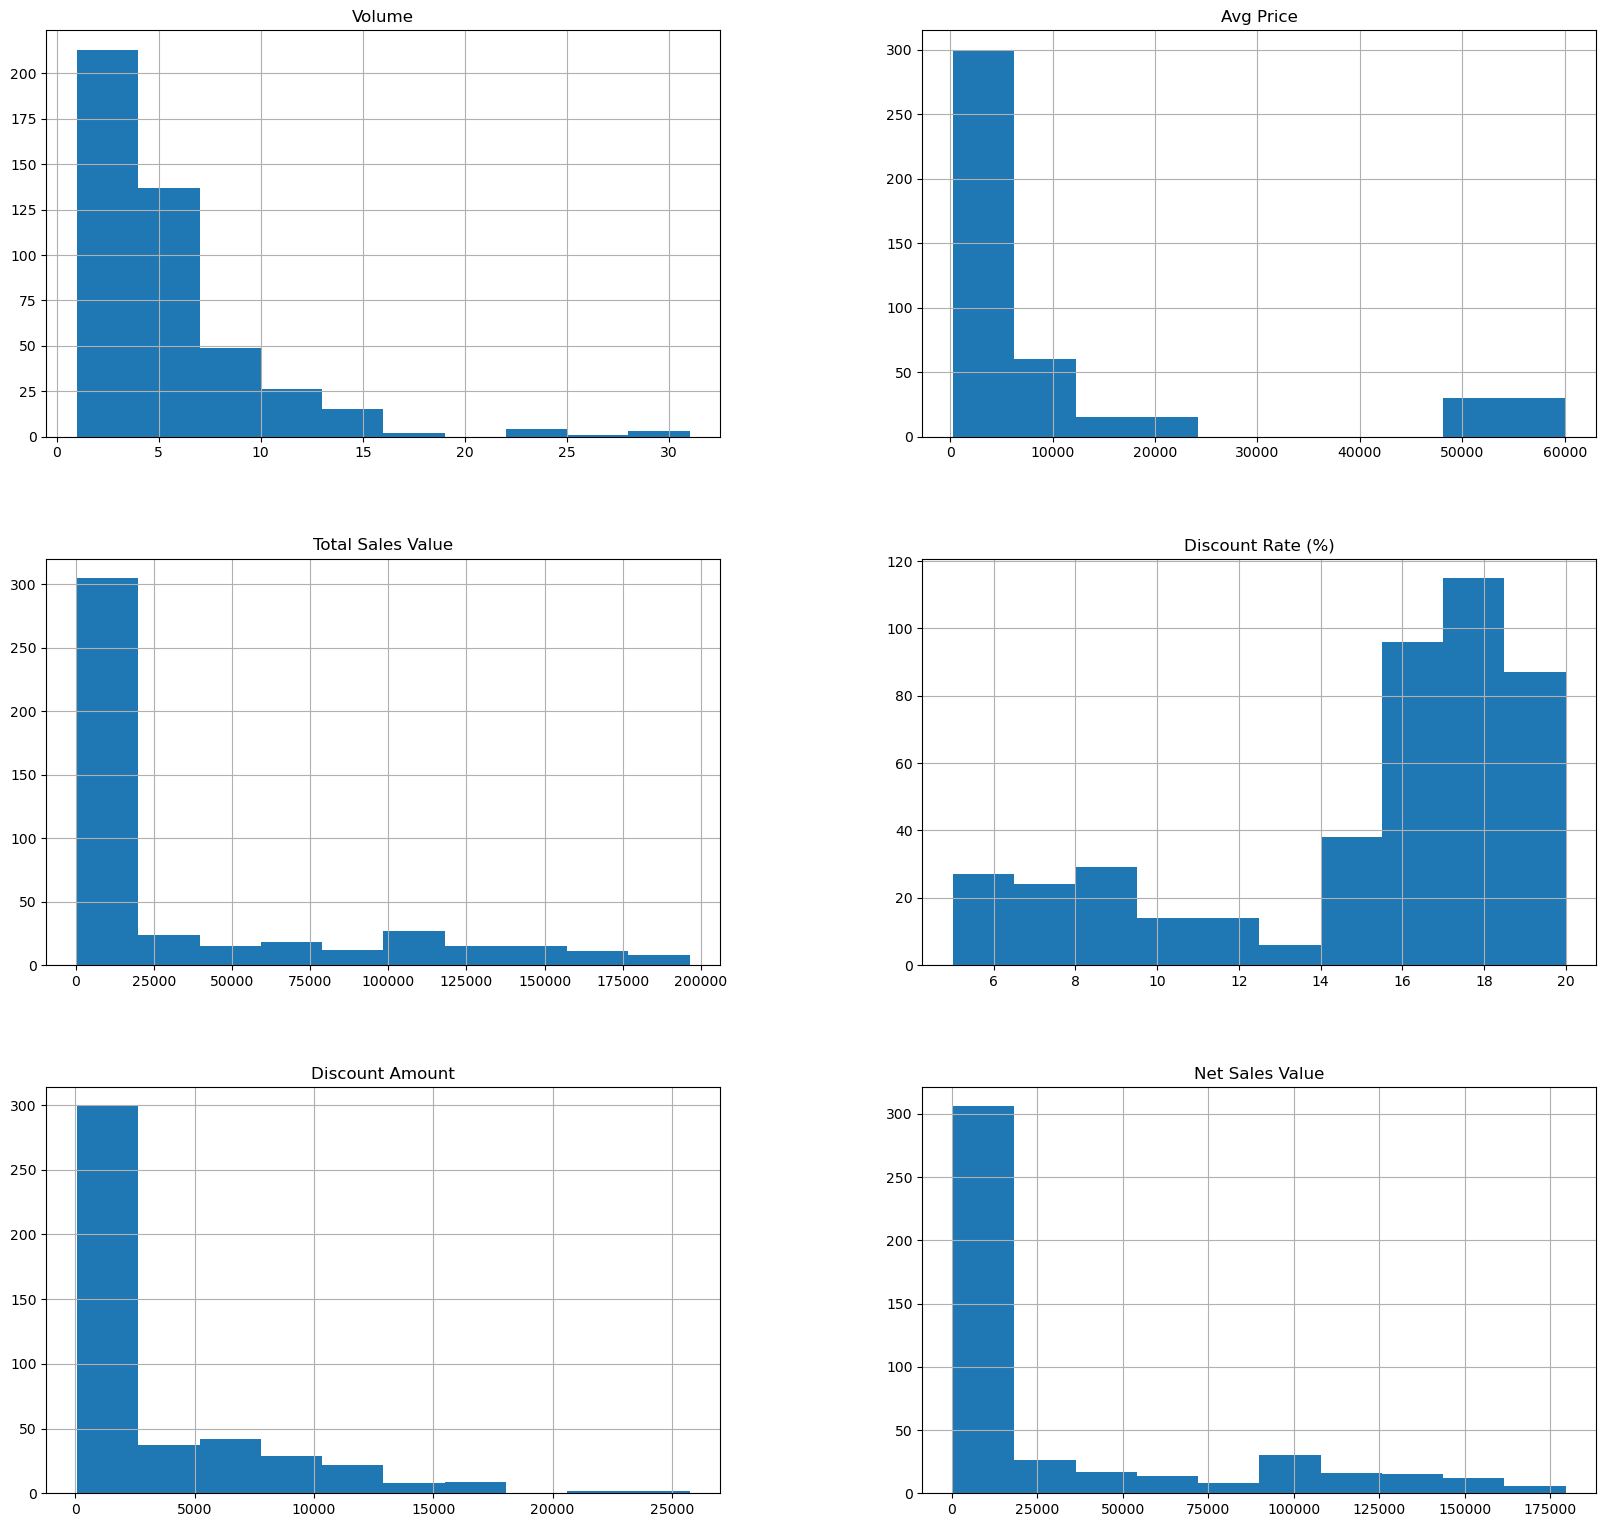

In [6]:
df.hist(figsize=(20,19))
plt.show()

In [7]:
#Right skewness found in Volume, Averrage Price, Total Sale Value,Discount Amount, Net Sale value
#Discount Rate has Left side skewness

In [8]:
def find_outlier(column):
    print(f"Column - {column.name} q1 q3 iqr lower Upper")
    q1= np.percentile(column,25)
    q3= np.percentile(column,75)
    iqr= q3-q1
    lQ = q1-1.5*iqr
    uQ = q3+1.5*iqr
    print("Q1=",q1, "Q3=",q3, "IQR=",iqr, "lQ=",lQ,"uQ=",uQ)
    print("outliers =>")
    for ind in column.index:
        if (column[ind] <lQ or  column[ind] > uQ):
            print(column[ind],end= " ")
    print("")
    print("===================")



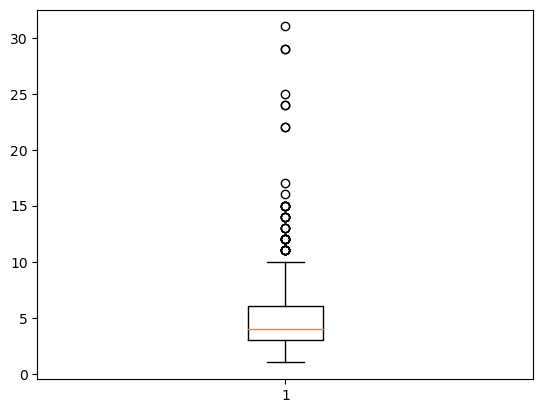

Column - Volume q1 q3 iqr lower Upper
Q1= 3.0 Q3= 6.0 IQR= 3.0 lQ= -1.5 uQ= 10.5
outliers =>
15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17 


In [9]:
plt.boxplot(df.Volume)
plt.show()
find_outlier(df.Volume)
#There are upper side outliers beyond max and there are no lower outliers

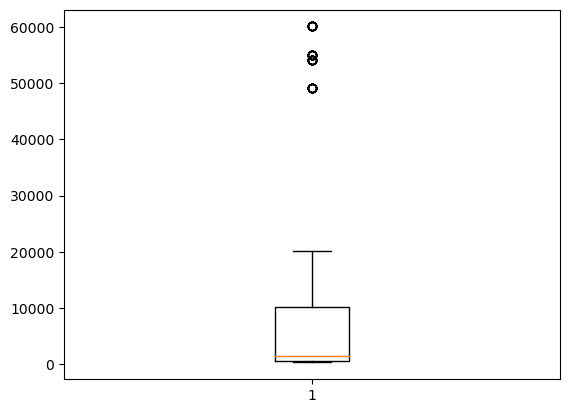

Column - Avg Price q1 q3 iqr lower Upper
Q1= 465.0 Q3= 10100.0 IQR= 9635.0 lQ= -13987.5 uQ= 24552.5
outliers =>
49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100 


In [10]:
plt.boxplot(df['Avg Price'])
plt.show()
#There are upper side find_outlier beyond max and there are no lower find_outlier
find_outlier(df['Avg Price'])

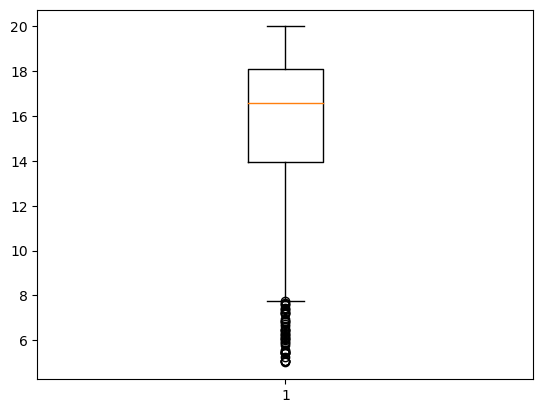

Column - Discount Rate (%) q1 q3 iqr lower Upper
Q1= 13.965062543701741 Q3= 18.114718477752703 IQR= 4.149655934050962 lQ= 7.740578642625298 uQ= 24.339202378829146
outliers =>
6.935385325 5.553719335858815 7.410104486 6.214888201701022 5.252112549273296 7.621790957934959 5.007822189204133 5.870670938165718 6.710453536396899 6.095201440402829 5.935084193732397 7.584590638090228 7.732667088605965 7.233846742335281 5.420506661087877 6.849975641919071 7.256695570137941 7.178725899241335 7.679385595700298 5.794802079132935 5.059801277154096 6.8582545692088726 7.208362951650773 7.341874344 6.473304705016388 6.439919959844064 7.421325599756022 6.268913808500697 6.819110662867928 6.170397894995827 5.072124185625713 6.106930704565366 6.508719077620175 6.066191918625036 5.084108426 6.326891692775114 6.415230294327099 5.055218412429214 5.4118021861669225 5.511042321019265 5.485156670073213 5.466379335661308 6.008199566158192 6.642595335085532 5.425910532590122 


In [11]:
plt.boxplot(df['Discount Rate (%)'])
plt.show()

find_outlier(df['Discount Rate (%)'])
#There are no upper side outliers beyond max and there are lower outliers below min

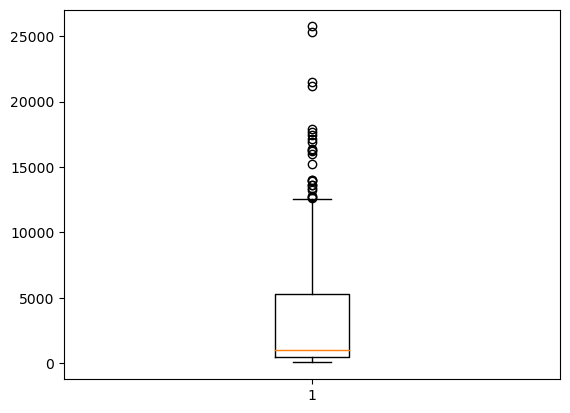

Column - Discount Amount q1 q3 iqr lower Upper
Q1= 460.4593038855329 Q3= 5316.4954266866525 IQR= 4856.03612280112 lQ= -6823.594880316146 uQ= 12600.54961088833
outliers =>
21153.49881959317 13594.039718999667 17900.983733131387 17445.603828100593 13951.660194455462 16384.029009441005 16892.520950977458 15214.643323596902 12622.50365770546 17178.331859479713 12753.565957988514 13999.93849871122 17696.813620554134 25328.224204195907 13608.238319227805 25738.02219375868 21496.67536736378 16332.91992953586 14036.838652156111 12734.009012409486 13275.780741136909 16218.594720354302 13382.22733345896 15984.732280583024 


In [12]:
plt.boxplot(df['Discount Amount'])
plt.show()
#There are upper side outliers beyond max and there are no lower outliers
find_outlier(df['Discount Amount'])

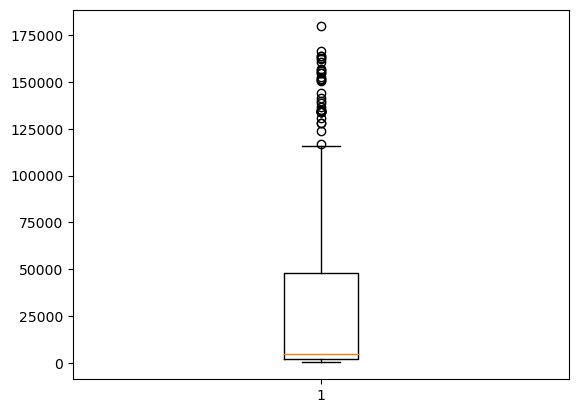

Column - Net Sales Value q1 q3 iqr lower Upper
Q1= 2202.2086453212287 Q3= 47847.91285159138 IQR= 45645.70420627015 lQ= -66266.347664084 uQ= 116316.46916099661
outliers =>
160346.50118040683 133705.96028100033 162399.01626686862 139563.63821492044 151348.33980554453 163915.971 179507.47904902254 134677.49634229453 134731.95462498485 152667.35835357232 151182.48953316535 128021.66814052028 134546.43404201147 150648.92786553132 151300.0615012888 162603.18637944586 144071.7757958041 133691.7616807722 155761.9778062413 130557.83332702736 136485.41909127205 154937.48547454836 123703.3246326362 134934.94669153576 154541.08736469384 163967.08007046414 156895.96877157467 166263.16134784388 127965.99098759051 134024.2192588631 116881.4052796457 133917.77266654104 141315.26771941697 138449.92203904898 156330.96988962853 


In [13]:
plt.boxplot(df['Net Sales Value'])
plt.show()
#There are upper side outliers beyond max and there are no lower outliers
find_outlier(df['Net Sales Value'])

In [14]:
find_outlier(df['Total Sales Value'])


Column - Total Sales Value q1 q3 iqr lower Upper
Q1= 2700.0 Q3= 53200.0 IQR= 50500.0 lQ= -73050.0 uQ= 128950.0
outliers =>
181500 147300 180300 133100 147300 165300 180300 196400 147300 147300 162300 162300 145200 147300 162300 165300 180300 169400 147300 181500 140700 147300 165300 145200 147300 165300 180300 165300 180300 140700 147300 133100 147300 157300 147300 165300 


Q1= 13.965062543701741 Q3= 18.114718477752703 IQR= 4.149655934050962 Min= 7.740578642625298 Max= 24.339202378829146


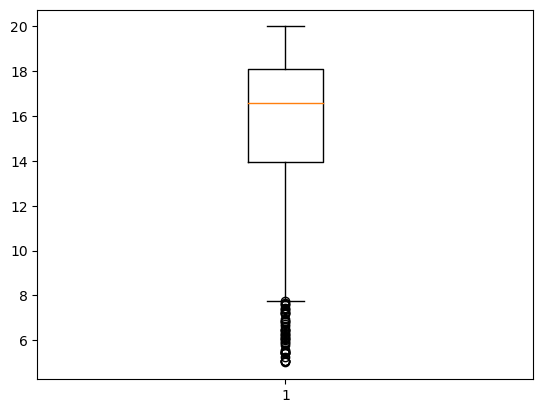

In [15]:
#Low Outliers: All values less than Q1 - (1.5 × IQR).
#High Outliers: All values greater than Q3 + (1.5 × IQR).
plt.boxplot(df['Discount Rate (%)'])
#extreme values - values are going up to 30 
# below 1st Quartile - 1.5 IQR
# above 3rd Quartile + 1.5 IQR
q1= np.percentile(df['Discount Rate (%)'],25)
q3= np.percentile(df['Discount Rate (%)'],75)
iqr= q3-q1
lmin = q1-1.5*iqr
lmax= q3+1.5*iqr
print("Q1=",q1, "Q3=",q3, "IQR=",iqr, "Min=",lmin,"Max=",lmax)
#There are no upper side outliers beyond max and there are lower outliers below min

Q1= 460.4593038855329 Q3= 5316.4954266866525 IQR= 4856.03612280112 Min= -6823.594880316146 Max= 12600.54961088833


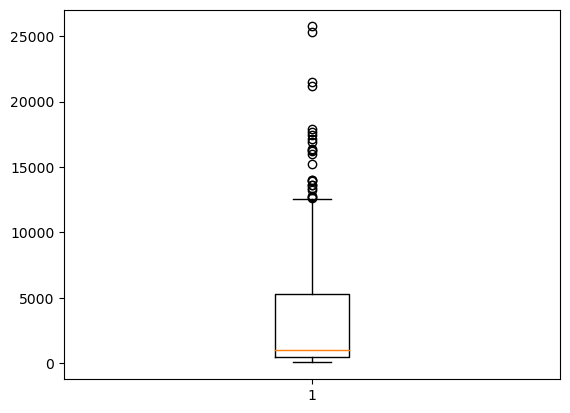

In [16]:
#Low Outliers: All values less than Q1 - (1.5 × IQR).
#High Outliers: All values greater than Q3 + (1.5 × IQR).
plt.boxplot(df['Discount Amount'])
#extreme values - values are going up to 30 
# below 1st Quartile - 1.5 IQR
# above 3rd Quartile + 1.5 IQR
q1= np.percentile(df['Discount Amount'],25)
q3= np.percentile(df['Discount Amount'],75)
iqr= q3-q1
lmin = q1-1.5*iqr
lmax= q3+1.5*iqr
print("Q1=",q1, "Q3=",q3, "IQR=",iqr, "Min=",lmin,"Max=",lmax)
#There are upper side outliers beyond max and there are no lower outliers

Q1= 2202.2086453212287 Q3= 47847.91285159138 IQR= 45645.70420627015 Min= -66266.347664084 Max= 116316.46916099661


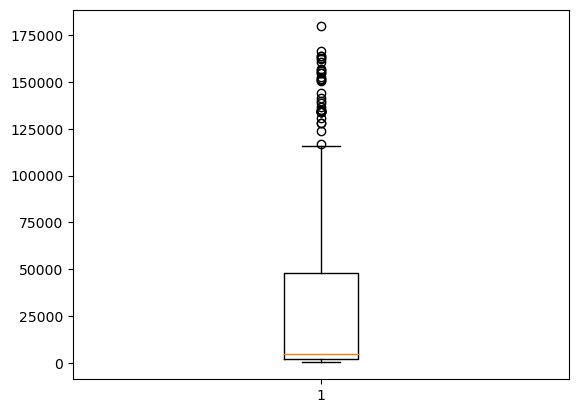

In [17]:
#Low Outliers: All values less than Q1 - (1.5 × IQR).
#High Outliers: All values greater than Q3 + (1.5 × IQR).
plt.boxplot(df['Net Sales Value'])
#extreme values - values are going up to 30 
# below 1st Quartile - 1.5 IQR
# above 3rd Quartile + 1.5 IQR
q1= np.percentile(df['Net Sales Value'],25)
q3= np.percentile(df['Net Sales Value'],75)
iqr= q3-q1
lmin = q1-1.5*iqr
lmax= q3+1.5*iqr
print("Q1=",q1, "Q3=",q3, "IQR=",iqr, "Min=",lmin,"Max=",lmax)
#There are upper side outliers beyond max and there are no lower outliers

In [18]:
#Bar Chart Analysis for Categorical Column: 
#Identify categorical columns in the dataset.
#'Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model' are of object type, thus categorical columns
#Create bar charts to visualize the frequency or count of each category.
#Analyze the distribution of categories and provide insights


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


<Axes: >

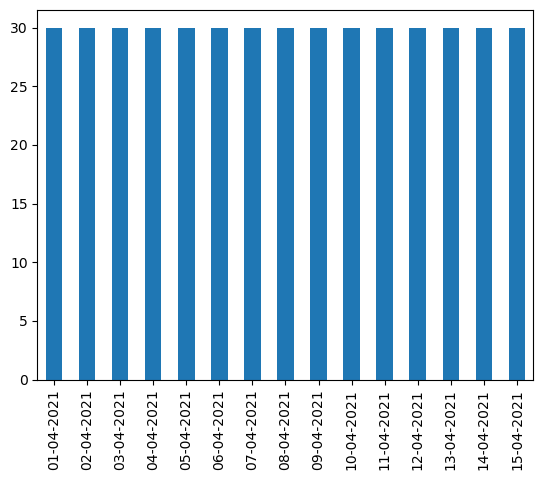

In [20]:
# Bar Plot
df['Date'].value_counts().plot.bar()
# 15 dates of data. 30 records on each date

<Axes: >

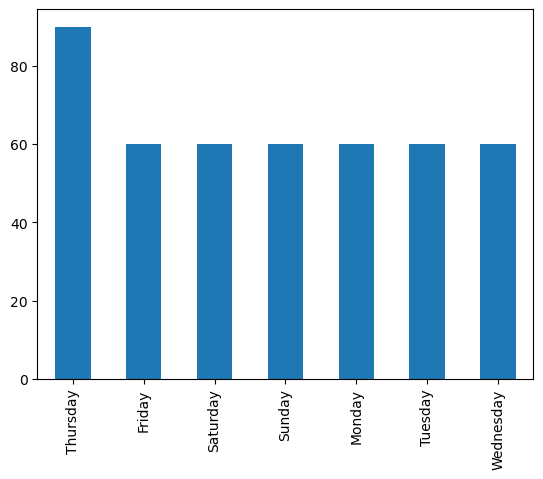

In [21]:
df['Day'].value_counts().plot.bar()
# Thursday has ~90 records, rest of days have 60 records.

<Axes: >

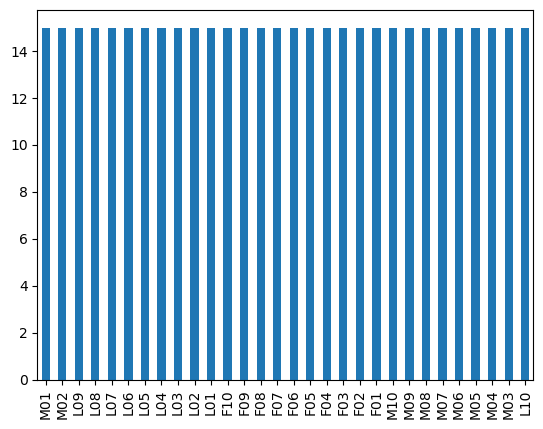

In [22]:
df['SKU'].value_counts().plot.bar()
#each SKU has 15 records in total which is coinciding with all records spanning 15 dates.
#SKU seems to be some code for unique properties/type of a product.


<Axes: >

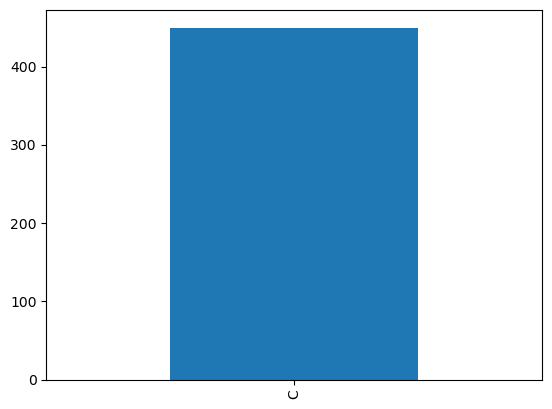

In [23]:
df['City'].value_counts().plot.bar()
# single city data - city name = 'C'

<Axes: >

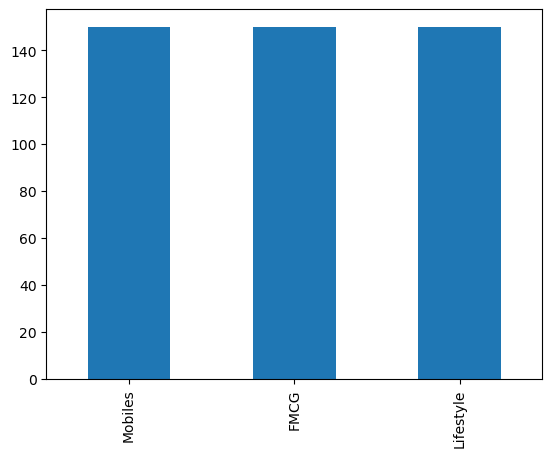

In [24]:
df['BU'].value_counts().plot.bar()
# 3 BU's = Mobiles, FMCG, LifeStyles

<Axes: >

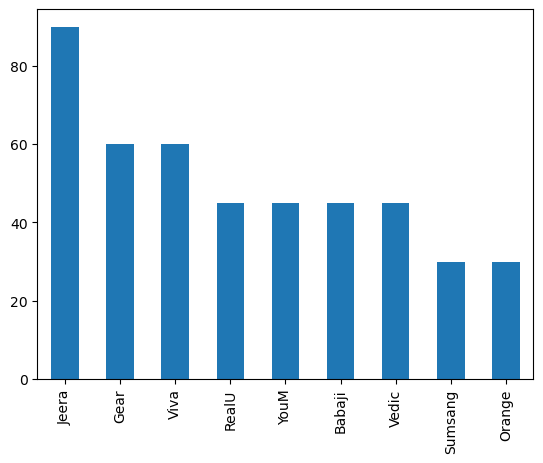

In [25]:
df['Brand'].value_counts().plot.bar()
# 9 brands in total across various products

0       Babaji Cream
1        Babaji Oil 
2     Babaji Shampoo
3      Gear BB Cream
4         Gear Cream
5           Gear Oil
6       Gear Shampoo
7          M- Inners
8        M- T Shirts
9          M-Casuals
10         M-Formals
11           M-Jeans
12           M-Shoes
13              O-10
14              O-11
15             RU-10
16              RU-9
17         RU-9 Plus
18              S-20
19              S-21
20       Vedic Cream
21         Vedic Oil
22     Vedic Shampoo
23         W-Casuals
24          W-Inners
25          W-Lounge
26         W-Western
27            YM-98 
28             YM-99
29        YM-99 Plus
Name: Model, dtype: object

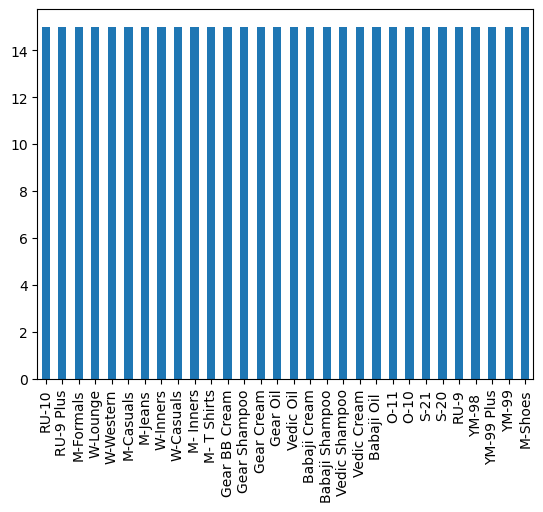

In [26]:
df['Model'].value_counts().plot.bar()
#30 Models for the products covered in this data set
df['Model'].mode()

#Standardization

<Axes: xlabel='Volume', ylabel='Density'>

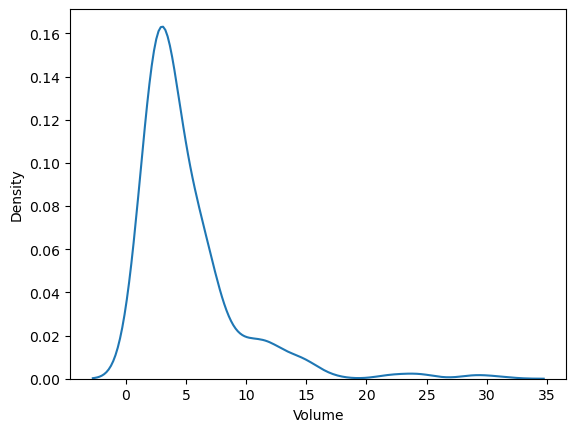

In [27]:
import seaborn as sns
sns.kdeplot(df['Volume'])

C:\Users\vinit\AppData\Local\Temp\ipykernel_21064\253520841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume'])


<Axes: xlabel='Volume', ylabel='Density'>

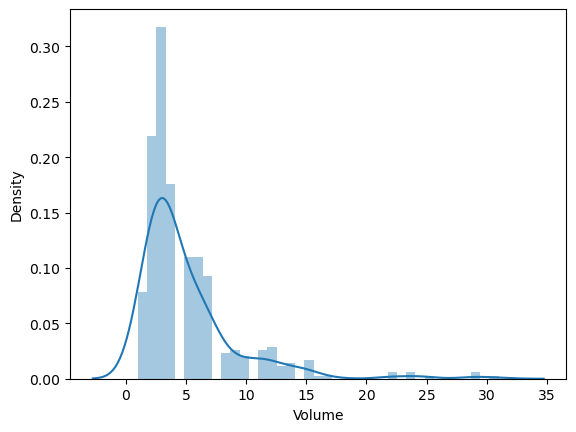

In [28]:
sns.distplot(df['Volume'])

<Axes: xlabel='Volume', ylabel='Count'>

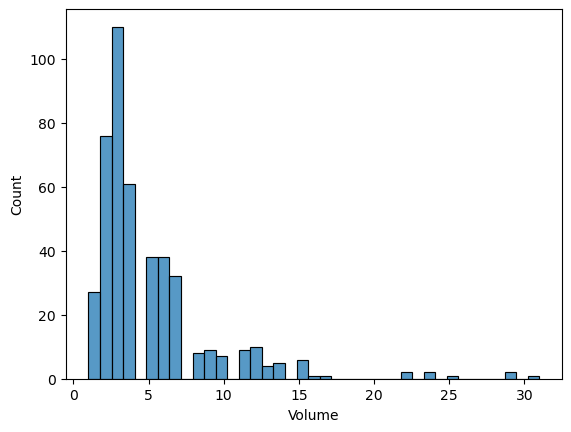

In [29]:
sns.histplot(df.Volume)

In [30]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

<Axes: xlabel='Avg Price', ylabel='Count'>

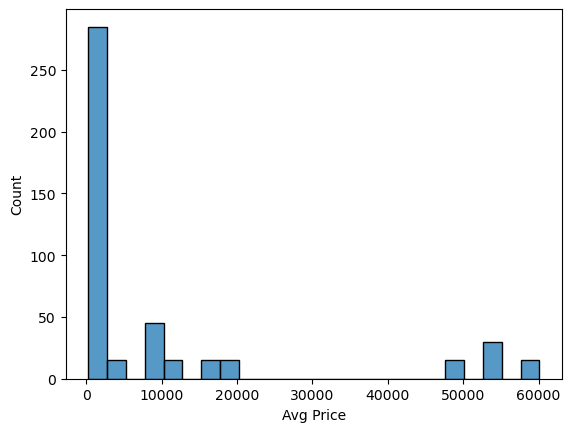

In [31]:
#Z-score for all numberics

df['Avg PriceZ']=(df['Avg Price']-df['Avg Price'].mean())/df['Avg Price'].std()
sns.histplot(df['Avg Price'])

<Axes: xlabel='Avg PriceZ', ylabel='Count'>

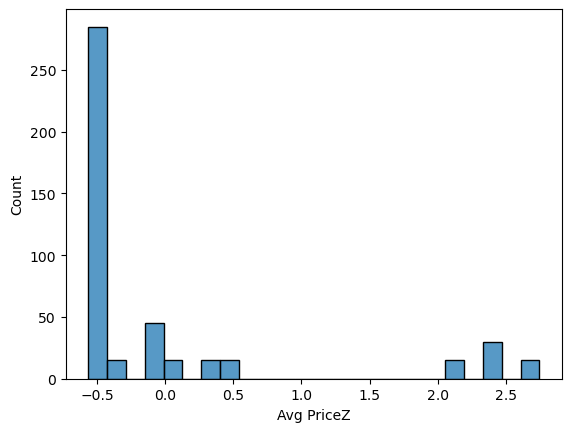

In [32]:
sns.histplot(df['Avg PriceZ'])

<Axes: xlabel='Total Sales ValueZ', ylabel='Count'>

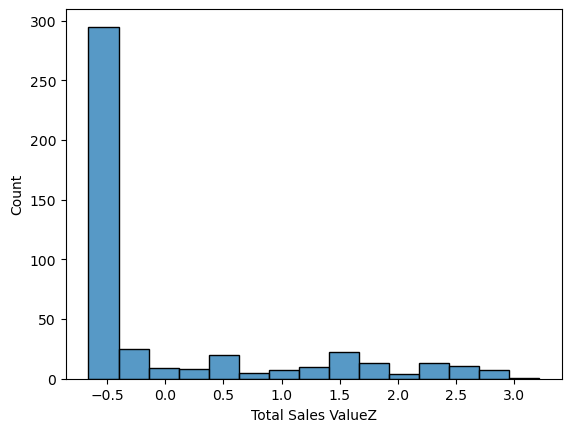

In [33]:
df['Total Sales ValueZ']=(df['Total Sales Value']-df['Total Sales Value'].mean())/df['Total Sales Value'].std()
sns.histplot(df['Total Sales ValueZ'])

<Axes: xlabel='Discount Rate (%)Z', ylabel='Count'>

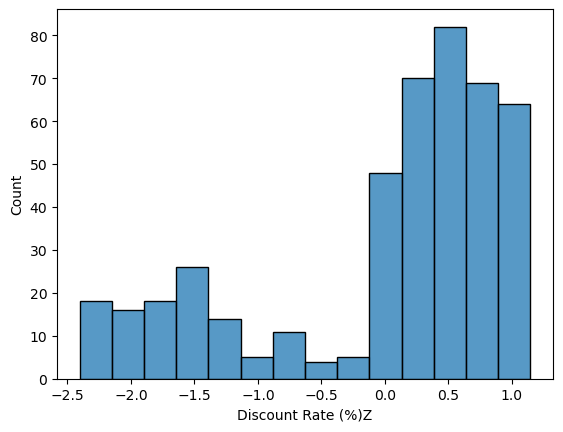

In [34]:
df['Discount Rate (%)Z']=(df['Discount Rate (%)']-df['Discount Rate (%)'].mean())/df['Discount Rate (%)'].std()
sns.histplot(df['Discount Rate (%)Z'])

<Axes: xlabel='Discount AmountZ', ylabel='Count'>

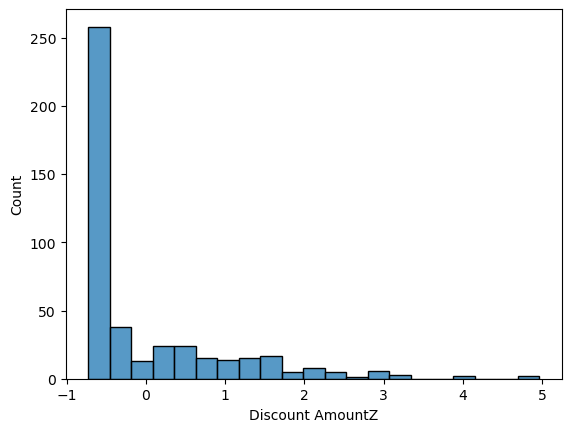

In [35]:
df['Discount AmountZ']=(df['Discount Amount']-df['Discount Amount'].mean())/df['Discount Amount'].std()
sns.histplot(df['Discount AmountZ'])

<Axes: xlabel='Net Sales ValueZ', ylabel='Count'>

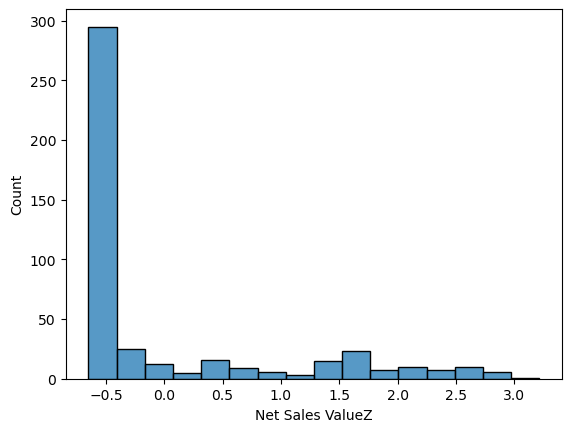

In [36]:
df['Net Sales ValueZ']=(df['Net Sales Value']-df['Net Sales Value'].mean())/df['Net Sales Value'].std()
sns.histplot(df['Net Sales ValueZ'])

In [37]:
#categorical columns - convert to dummy
# categorical columns dont work directly with Machine learning algorithms, thus they need to be converted into 
dfWithDummies = pd.get_dummies(data = df, columns=['SKU','Model','BU',"Brand"])

In [38]:
names=dfWithDummies.columns
for i in range(names.size):
    if(i>13):
        print(names[i],end=" ")
        
#SKU = had 30 distinct values, thus 30 columns got added for each of the values
#Model = had 30 distinct values, thus 30 columns got added for each of the values

SKU_F01 SKU_F02 SKU_F03 SKU_F04 SKU_F05 SKU_F06 SKU_F07 SKU_F08 SKU_F09 SKU_F10 SKU_L01 SKU_L02 SKU_L03 SKU_L04 SKU_L05 SKU_L06 SKU_L07 SKU_L08 SKU_L09 SKU_L10 SKU_M01 SKU_M02 SKU_M03 SKU_M04 SKU_M05 SKU_M06 SKU_M07 SKU_M08 SKU_M09 SKU_M10 Model_Babaji Cream Model_Babaji Oil  Model_Babaji Shampoo Model_Gear BB Cream Model_Gear Cream Model_Gear Oil Model_Gear Shampoo Model_M- Inners Model_M- T Shirts Model_M-Casuals Model_M-Formals Model_M-Jeans Model_M-Shoes Model_O-10 Model_O-11 Model_RU-10 Model_RU-9 Model_RU-9 Plus Model_S-20 Model_S-21 Model_Vedic Cream Model_Vedic Oil Model_Vedic Shampoo Model_W-Casuals Model_W-Inners Model_W-Lounge Model_W-Western Model_YM-98  Model_YM-99 Model_YM-99 Plus BU_FMCG BU_Lifestyle BU_Mobiles Brand_Babaji Brand_Gear Brand_Jeera Brand_Orange Brand_RealU Brand_Sumsang Brand_Vedic Brand_Viva Brand_YouM 

In [39]:
df['SKU'].mode().count()

30

In [40]:
df['Model'].mode().count()

30

In [41]:
dfWithDummies

,Date,Day,City,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Avg PriceZ,...,BU_Mobiles,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,01-04-2021,Thursday,C,15,12100,181500,11.654820,21153.498820,160346.501180,0.091072,...,1,0,0,0,0,1,0,0,0,0
1,01-04-2021,Thursday,C,10,10100,101000,11.560498,11676.102961,89323.897039,-0.019548,...,1,0,0,0,0,1,0,0,0,0
2,01-04-2021,Thursday,C,7,16100,112700,9.456886,10657.910157,102042.089843,0.312312,...,1,0,0,0,0,0,0,0,0,1
3,01-04-2021,Thursday,C,6,20100,120600,6.935385,8364.074702,112235.925298,0.533552,...,1,0,0,0,0,0,0,0,0,1
4,01-04-2021,Thursday,C,3,8100,24300,17.995663,4372.946230,19927.053770,-0.130168,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,C,2,1300,2600,15.475687,402.367873,2197.632127,-0.506277,...,0,0,0,1,0,0,0,0,0,0
446,15-04-2021,Thursday,C,6,2600,15600,17.057027,2660.896242,12939.103758,-0.434374,...,0,0,0,0,0,0,0,0,1,0
447,15-04-2021,Thursday,C,2,1600,3200,18.965550,606.897606,2593.102394,-0.489684,...,0,0,0,0,0,0,0,0,1,0
448,15-04-2021,Thursday,C,3,1900,5700,16.793014,957.201826,4742.798174,-0.473091,...,0,0,0,1,0,0,0,0,0,0


In [42]:
#Summarize the key findings from the descriptive analytics and data visualizations.
#   descriptive analysis:large gap between Max and 75% , indicating presence of outliers
#   visalization like bar chart shows skewedness on right for most of the columns except "Discount Rate (%)
#  


#Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.
#   z-scoring brought all numerics to same scale 
#   Converting categorical data will help in applying various statistical techniques for analysis to these columns.